# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.328924e+01     1.369612e+01
 * time: 0.0042150020599365234
     1     5.973916e+01     9.237884e+00
 * time: 0.013177156448364258
     2     5.468669e+01     1.444859e+01
 * time: 0.03393816947937012
     3     3.807119e+01     9.822070e+00
 * time: 0.06752419471740723
     4     2.713241e+01     7.718935e+00
 * time: 0.10210108757019043
     5     1.763884e+01     4.225037e+00
 * time: 0.12740206718444824
     6     1.188311e+01     2.973761e+00
 * time: 0.15034008026123047
     7     8.917112e+00     3.744440e+00
 * time: 0.16886401176452637
     8     7.594527e+00     2.124217e+00
 * time: 0.19235610961914062
     9     7.056222e+00     1.767642e+00
 * time: 0.21269822120666504
    10     6.579802e+00     1.622503e+00
 * time: 0.23206520080566406
    11     6.109091e+00     1.745678e+00
 * time: 0.3465080261230469
    12     5.869931e+00     9.361211e-01
 * time: 0.36293911933898926
    13     5.787584e+00     1.004129e+00
 * tim

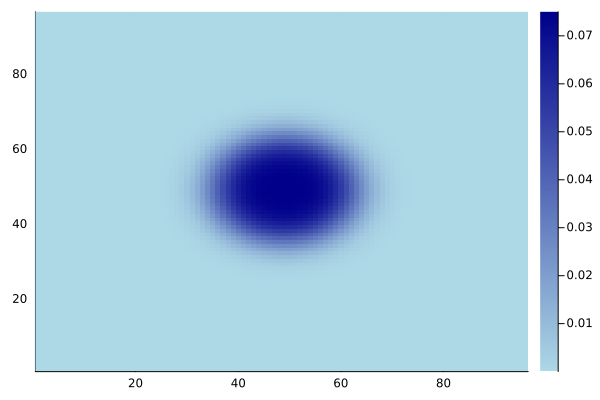

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)